# Part 1: Wrangling

### Problem 1

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sqlite_file = 'lahman2014.sqlite'
conn = sqlite3.connect(sqlite_file)

salary_query = "SELECT Teams.yearID as Year,  Teams.teamID as Team, Teams.franchID as Franchise, Rank, Teams.lgID as League, G, W, L, (CAST(W as FLOAT)/CAST(G as FLOAT) * 100) as WinPercent, sum(salary) as Total_Payroll FROM Teams INNER JOIN Salaries ON (Teams.teamID = Salaries.teamID AND Teams.yearID = Salaries.yearID) WHERE (Teams.YearID >= 1990 and Teams.YearID <= 2014) GROUP BY Teams.teamID, Teams.yearID" 

team_salaries = pd.read_sql(salary_query, conn)
team_salaries

,Year,Team,Franchise,Rank,League,G,W,L,WinPercent,Total_Payroll
0,1997,ANA,ANA,2,AL,162,84,78,51.851852,31135472.0
1,1998,ANA,ANA,2,AL,162,85,77,52.469136,41281000.0
2,1999,ANA,ANA,4,AL,162,70,92,43.209877,55388166.0
3,2000,ANA,ANA,3,AL,162,82,80,50.617284,51464167.0
4,2001,ANA,ANA,3,AL,162,75,87,46.296296,47535167.0
...,...,...,...,...,...,...,...,...,...,...
723,2010,WAS,WSN,5,NL,162,69,93,42.592593,61400000.0
724,2011,WAS,WSN,3,NL,161,80,81,49.689441,63856928.0
725,2012,WAS,WSN,1,NL,162,98,64,60.493827,80855143.0
726,2013,WAS,WSN,2,NL,162,86,76,53.086420,113703270.0


By using an inner join, I simply excluded the data as not having the year, teamId, rank, payroll or any of the data
would make it hard to use and calculate. The data that is provided is sufficient enough

# Part 2: Exploratory Data Analysis

### Problem 2

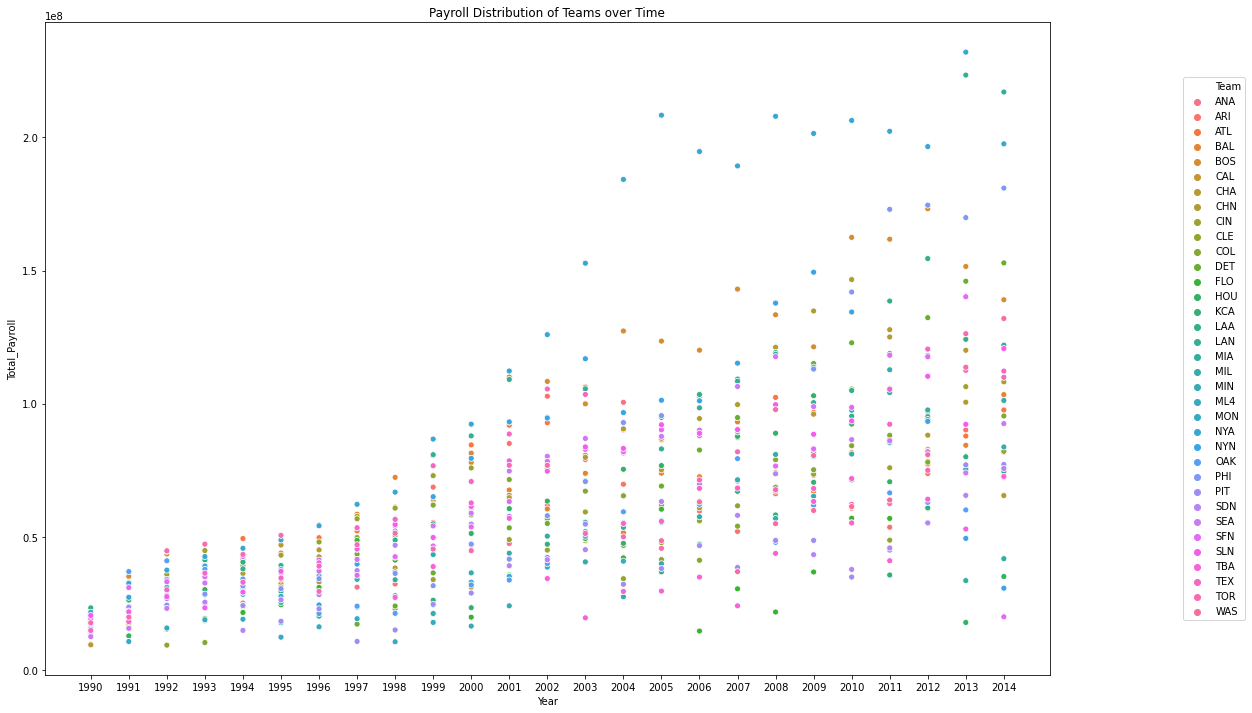

In [4]:
firstplot = sns.scatterplot(x='Year', y='Total_Payroll', hue='Team', data=team_salaries)

coord = firstplot.get_position()
firstplot.set_position([coord.x0, coord.y0, coord.width * 3, coord.height * 3])

firstplot.legend(loc='center right', bbox_to_anchor=(1.2, .5))
firstplot.set_xticks(range(1990,2015))
firstplot.set_title("Payroll Distribution of Teams over Time")

#team_salaries.plot(kind = "scatter", x = "yearID", y = "Total_Payroll", c = "red")
firstplot

### Question 1:
The above is a scatterplot of the total payroll of every team from 1990 to 2014. The general trend is that as year increases, the payroll increases as well. It doesn't always change but it does increase as you go on. Additionally as the years increase, the disparity between how much different teams can pay also increases as the range and the spread increases in payroll.

### Problem 3

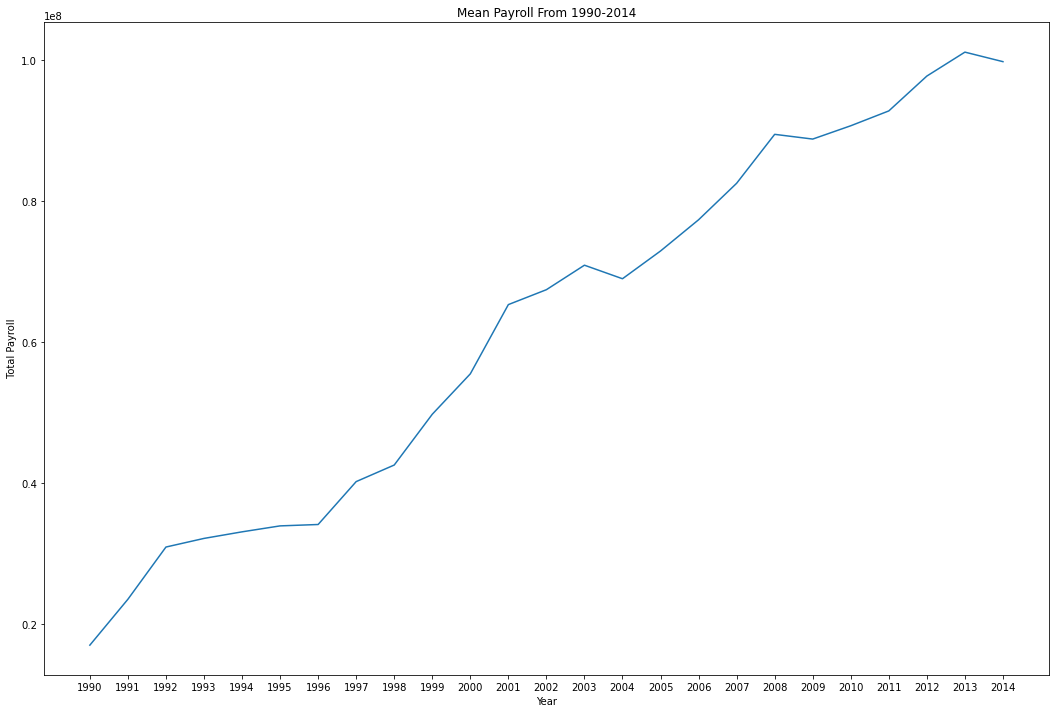

In [5]:
mean_data = team_salaries.groupby("Year")["Total_Payroll"].mean()
plottwo = sns.lineplot(x = mean_data.index, y = mean_data.values)
coord = plottwo.get_position()
plottwo.set_position([coord.x0, coord.y0, coord.width * 3, coord.height * 3])
plottwo.set_xticks(range(1990,2015))
plottwo.set(ylabel = " Total Payroll")
plottwo.set_title("Mean Payroll From 1990-2014")
plottwo


### Problem 4

162
308
458
608
728


<Figure size 432x288 with 0 Axes>

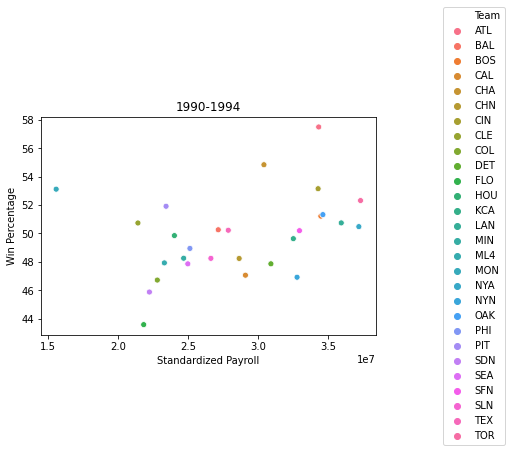

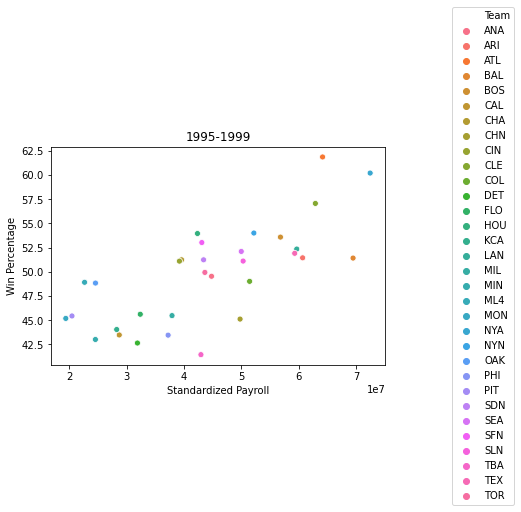

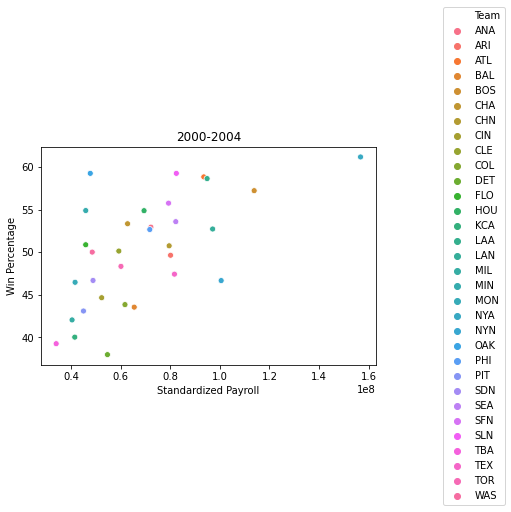

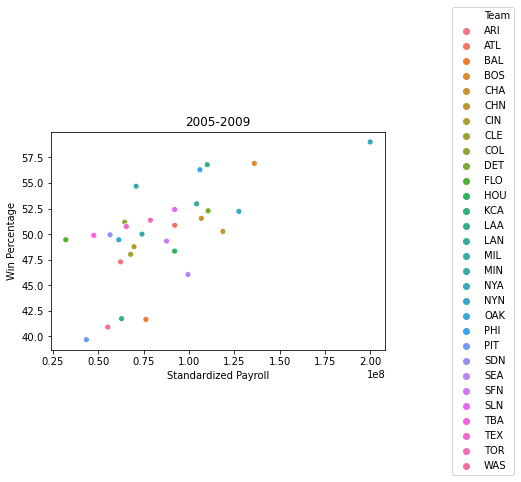

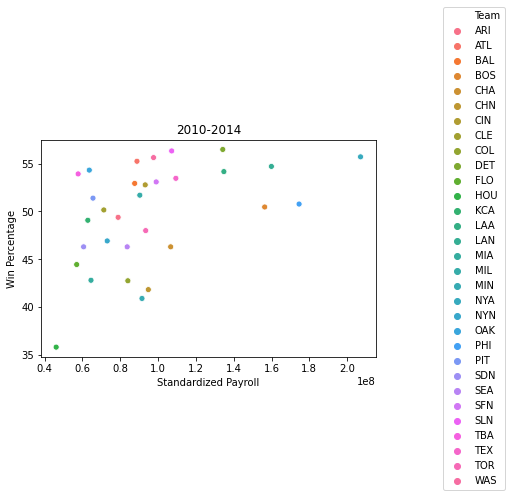

<Figure size 432x288 with 0 Axes>

In [6]:
team_salaries['Range'] = pd.cut(x = team_salaries["Year"], bins = [1990,1995,2000,2005,2010,2015], include_lowest=True)
first = pd.DataFrame(columns=['Team','Payroll','win_percent'])
second = pd.DataFrame(columns=['Team','Payroll','win_percent'])
third = pd.DataFrame(columns=['Team','Payroll','win_percent'])
fourth = pd.DataFrame(columns=['Team','Payroll','win_percent'])
fifth = pd.DataFrame(columns=['Team','Payroll','win_percent'])

a = 0
b = 0
c = 0
d = 0
e = 0

for i,rows in team_salaries.iterrows():
    #print(rows['Range'] == pd.Interval(left = 1989.999,right=1995))
    if rows['Range'] == pd.Interval(left = 1989.999,right=1995):
        first.loc[-1] = [rows['Team'],rows['Total_Payroll'],rows["WinPercent"]]
        first.index = first.index + 1
        a = a+1
    if rows['Range'] == pd.Interval(left = 1995,right=2000):
        second.loc[-1] = [rows['Team'],rows['Total_Payroll'],rows["WinPercent"]]
        second.index = second.index + 1
        b = b + 1
    if rows['Range'] == pd.Interval(left = 2000,right=2005):
        third.loc[-1] = [rows['Team'],rows['Total_Payroll'],rows["WinPercent"]]
        third.index = third.index + 1
        c = c + 1
    if rows['Range'] == pd.Interval(left = 2005,right=2010):
        fourth.loc[-1] = [rows['Team'],rows['Total_Payroll'],rows["WinPercent"]]
        fourth.index = fourth.index + 1
        d = d + 1
    if rows['Range'] == pd.Interval(left = 2010,right=2015):
        fifth.loc[-1] = [rows['Team'],rows['Total_Payroll'],rows["WinPercent"]]
        fifth.index = fifth.index + 1
        e = e + 1
print(a)
print(a+b)
print(a+b+c)
print(a+b+c+d)
print(a+b+c+d+e)
mean_data_win = first.groupby("Team")["win_percent"].mean()
mean_data_pay = first.groupby("Team")["Payroll"].mean()
first = sns.scatterplot(y=mean_data_win.values, x=mean_data_pay.values, hue = mean_data_win.index)
first.set_title("1990-1994")
first.legend(loc='center right', bbox_to_anchor=(1.4, .5))
first.set(ylabel = "Win Percentage", xlabel = "Standardized Payroll")
plt.figure()
mean_data_win = second.groupby("Team")["win_percent"].mean()
mean_data_pay = second.groupby("Team")["Payroll"].mean()
second = sns.scatterplot(y=mean_data_win.values, x=mean_data_pay.values, hue = mean_data_win.index)
second.set(ylabel = "Win Percentage", xlabel = "Standardized Payroll")
second.set_title("1995-1999")
second.legend(loc='center right', bbox_to_anchor=(1.4, .5))
plt.figure()
mean_data_win = third.groupby("Team")["win_percent"].mean()
mean_data_pay = third.groupby("Team")["Payroll"].mean()
third = sns.scatterplot(y=mean_data_win.values, x=mean_data_pay.values, hue = mean_data_win.index)
third.set_title("2000-2004")
third.set(ylabel = "Win Percentage", xlabel = "Standardized Payroll")
third.legend(loc='center right', bbox_to_anchor=(1.4, .5))
plt.figure()
mean_data_win = fourth.groupby("Team")["win_percent"].mean()
mean_data_pay = fourth.groupby("Team")["Payroll"].mean()
fourth = sns.scatterplot(y=mean_data_win.values, x=mean_data_pay.values, hue = mean_data_win.index)
fourth.set_title("2005-2009")
fourth.set(ylabel = "Win Percentage", xlabel = "Standardized Payroll")
fourth.legend(loc='center right', bbox_to_anchor=(1.4, .5))
plt.figure()
mean_data_win = fifth.groupby("Team")["win_percent"].mean()
mean_data_pay = fifth.groupby("Team")["Payroll"].mean()
fifth = sns.scatterplot(y=mean_data_win.values, x=mean_data_pay.values, hue = mean_data_win.index)
fifth.set_title("2010-2014")
fifth.set(ylabel = "Win Percentage", xlabel = "Standardized Payroll")
fifth.legend(loc='center right', bbox_to_anchor=(1.4, .5))
plt.figure()


### Question 2:
Each of the above plots are the win percentage of each team in relation to their payroll. Although it is very spread out, it is apparent that generally speaking, the more one spends, the higher the win percentage. NYA or NYN is really good at spending a lot and winning a lot. The Oakland A's on the other hand are good at being the outlier in terms of spending less but still being able to win a decent amount such as in 2000-2014 where they averaged a lot more than 50%.

# Part 3

### Problem 5

In [7]:
mean_payroll = team_salaries.groupby('Year')['Total_Payroll'].mean()
std_dev_payroll = team_salaries.groupby('Year')['Total_Payroll'].std()

team_salaries = team_salaries.drop(columns = ["Range"])
team_salaries['mean_payroll'] = team_salaries['Year'].apply(lambda m : mean_payroll[m])
team_salaries['sd_payroll'] = team_salaries['Year'].apply(lambda s : std_dev_payroll[s])
team_salaries['s_payroll'] = team_salaries.apply(lambda i : (i.Total_Payroll - i.mean_payroll) / i.sd_payroll, axis=1)

team_salaries

,Year,Team,Franchise,Rank,League,G,W,L,WinPercent,Total_Payroll,mean_payroll,sd_payroll,s_payroll
0,1997,ANA,ANA,2,AL,162,84,78,51.851852,31135472.0,4.026021e+07,1.306073e+07,-0.698639
1,1998,ANA,ANA,2,AL,162,85,77,52.469136,41281000.0,4.260943e+07,1.538081e+07,-0.086369
2,1999,ANA,ANA,4,AL,162,70,92,43.209877,55388166.0,4.980762e+07,2.056133e+07,0.271410
3,2000,ANA,ANA,3,AL,162,82,80,50.617284,51464167.0,5.553784e+07,2.141622e+07,-0.190214
4,2001,ANA,ANA,3,AL,162,75,87,46.296296,47535167.0,6.535544e+07,2.470771e+07,-0.721244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,2010,WAS,WSN,5,NL,162,69,93,42.592593,61400000.0,9.071200e+07,3.811503e+07,-0.769040
724,2011,WAS,WSN,3,NL,161,80,81,49.689441,63856928.0,9.281684e+07,4.081197e+07,-0.709594
725,2012,WAS,WSN,1,NL,162,98,64,60.493827,80855143.0,9.775804e+07,3.681754e+07,-0.459099
726,2013,WAS,WSN,2,NL,162,86,76,53.086420,113703270.0,1.011509e+08,4.883029e+07,0.257062


### Problem 6

<Figure size 432x288 with 0 Axes>

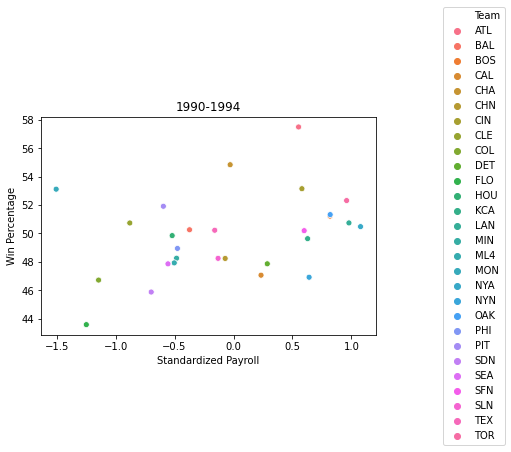

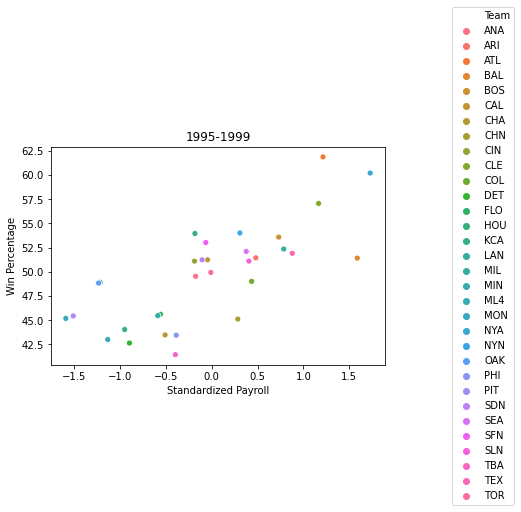

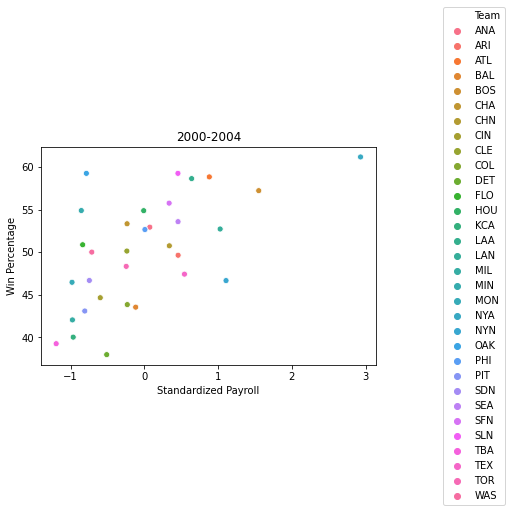

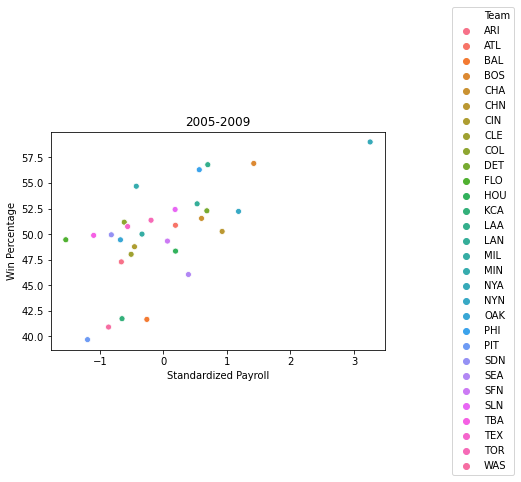

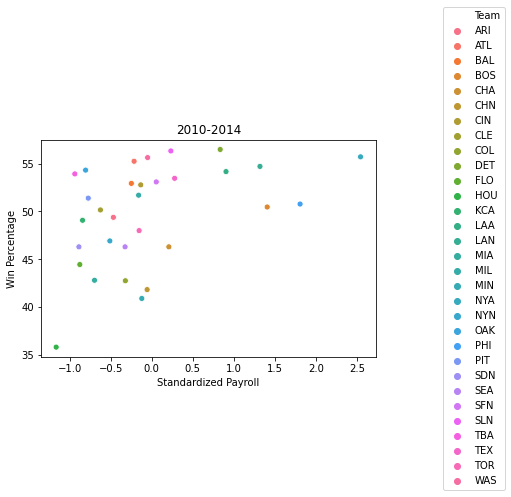

<Figure size 432x288 with 0 Axes>

In [8]:
team_salaries['Range'] = pd.cut(x = team_salaries["Year"], bins = [1990,1995,2000,2005,2010,2015], include_lowest=True)
first = pd.DataFrame(columns=['Team','Payroll','win_percent'])
second = pd.DataFrame(columns=['Team','Payroll','win_percent'])
third = pd.DataFrame(columns=['Team','Payroll','win_percent'])
fourth = pd.DataFrame(columns=['Team','Payroll','win_percent'])
fifth = pd.DataFrame(columns=['Team','Payroll','win_percent'])

for i,rows in team_salaries.iterrows():
    #print(rows['Range'] == pd.Interval(left = 1989.999,right=1995))
    if rows['Range'] == pd.Interval(left = 1989.999,right=1995):
        first.loc[-1] = [rows['Team'],rows['s_payroll'],rows["WinPercent"]]
        first.index = first.index + 1
    if rows['Range'] == pd.Interval(left = 1995,right=2000):
        second.loc[-1] = [rows['Team'],rows['s_payroll'],rows["WinPercent"]]
        second.index = second.index + 1
    if rows['Range'] == pd.Interval(left = 2000,right=2005):
        third.loc[-1] = [rows['Team'],rows['s_payroll'],rows["WinPercent"]]
        third.index = third.index + 1
    if rows['Range'] == pd.Interval(left = 2005,right=2010):
        fourth.loc[-1] = [rows['Team'],rows['s_payroll'],rows["WinPercent"]]
        fourth.index = fourth.index + 1
    if rows['Range'] == pd.Interval(left = 2010,right=2015):
        fifth.loc[-1] = [rows['Team'],rows['s_payroll'],rows["WinPercent"]]
        fifth.index = fifth.index + 1

mean_data_win = first.groupby("Team")["win_percent"].mean()
mean_data_pay = first.groupby("Team")["Payroll"].mean()
first = sns.scatterplot(y=mean_data_win.values, x=mean_data_pay.values, hue = mean_data_win.index)
first.set_title("1990-1994")
first.set(ylabel = "Win Percentage", xlabel = "Standardized Payroll")
first.legend(loc='center right', bbox_to_anchor=(1.4, .5))

plt.figure()
mean_data_win = second.groupby("Team")["win_percent"].mean()
mean_data_pay = second.groupby("Team")["Payroll"].mean()
second = sns.scatterplot(y=mean_data_win.values, x=mean_data_pay.values, hue = mean_data_win.index)
second.set_title("1995-1999")
second.set(ylabel = "Win Percentage", xlabel = "Standardized Payroll")
second.legend(loc='center right', bbox_to_anchor=(1.4, .5))
plt.figure()
mean_data_win = third.groupby("Team")["win_percent"].mean()
mean_data_pay = third.groupby("Team")["Payroll"].mean()
third = sns.scatterplot(y=mean_data_win.values, x=mean_data_pay.values, hue = mean_data_win.index)
third.set_title("2000-2004")
third.set(ylabel = "Win Percentage", xlabel = "Standardized Payroll")
third.legend(loc='center right', bbox_to_anchor=(1.4, .5))
plt.figure()
mean_data_win = fourth.groupby("Team")["win_percent"].mean()
mean_data_pay = fourth.groupby("Team")["Payroll"].mean()
fourth = sns.scatterplot(y=mean_data_win.values, x=mean_data_pay.values, hue = mean_data_win.index)
fourth.set_title("2005-2009")
fourth.set(ylabel = "Win Percentage", xlabel = "Standardized Payroll")
fourth.legend(loc='center right', bbox_to_anchor=(1.4, .5))
plt.figure()
mean_data_win = fifth.groupby("Team")["win_percent"].mean()
mean_data_pay = fifth.groupby("Team")["Payroll"].mean()
fifth = sns.scatterplot(y=mean_data_win.values, x=mean_data_pay.values, hue = mean_data_win.index)
fifth.set_title("2010-2014")
fifth.set(ylabel = "Win Percentage", xlabel = "Standardized Payroll")
fifth.legend(loc='center right', bbox_to_anchor=(1.4, .5))
plt.figure()

### Question 3:
All of the above plots are the standardized payroll versus the win percentage of teams split between 5 year gaps. The plots from Problem 4 and Problem 6 are the same in shape, the only difference is the x-axis from standardized payroll and regular payroll. Standardized payroll show how far from the average (against standard deviation) the teams payroll is. And it is clear that teams like NY spend a ton more than the deviation. The transformation is to Z-scores by taking the mean and calculating the difference from the standard deviation.

### Problem 7:

Text(0.5, 1.0, 'Winning percentage versus Standardized Payroll Relationship')

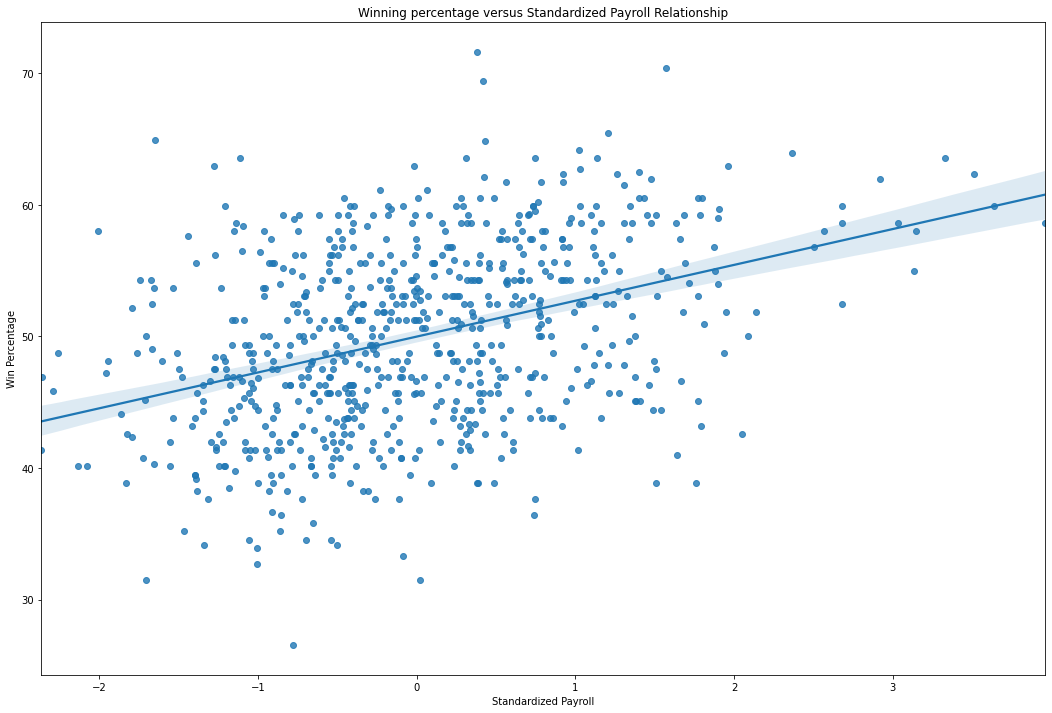

In [9]:
complete = pd.DataFrame(columns=['Team','Payroll','win_percent'])
for i,rows in team_salaries.iterrows():
    complete.loc[-1] = [rows['Team'],rows['s_payroll'],rows["WinPercent"]]
    complete.index = complete.index + 1
mean_data_win = complete.groupby("Team")["win_percent"].mean()
mean_data_pay = complete.groupby("Team")["Payroll"].mean()

complete_standardized = sns.regplot(x='s_payroll', y='WinPercent', data = team_salaries)

coord = complete_standardized.get_position()
complete_standardized.set(ylabel = "Win Percentage", xlabel = "Standardized Payroll")
complete_standardized.set_position([coord.x0, coord.y0, coord.width * 3, coord.height * 3])
complete_standardized.set_title("Winning percentage versus Standardized Payroll Relationship")

### Problem 8:

,Year,Team,Franchise,Rank,League,G,W,L,WinPercent,Total_Payroll,Efficiency,mean_payroll,sd_payroll,s_payroll
0,1990,ATL,ATL,6,NL,162,65,97,40.123457,14555501.0,-8.208354,1.707235e+07,3.771834e+06,-0.667275
1,1991,ATL,ATL,1,NL,162,94,68,58.024691,18403500.0,9.901245,2.357879e+07,6.894669e+06,-0.750621
2,1992,ATL,ATL,1,NL,162,98,64,60.493827,34625333.0,9.498566,3.098244e+07,9.150607e+06,0.398104
3,1993,ATL,ATL,1,NL,162,104,58,64.197531,41641417.0,11.642311,3.220500e+07,9.232485e+06,1.022088
4,1994,ATL,ATL,2,NL,114,68,46,59.649123,49383513.0,4.886847,3.313701e+07,8.528749e+06,1.904910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,2010,TBA,TBD,1,AL,162,96,66,59.259259,71923471.0,10.491616,9.071200e+07,3.811503e+07,-0.492943
88,2011,TBA,TBD,2,AL,162,91,71,56.172840,41053571.0,9.343678,9.281684e+07,4.081197e+07,-1.268335
89,2012,TBA,TBD,3,AL,162,90,72,55.555556,64173500.0,7.836027,9.775804e+07,3.681754e+07,-0.912189
90,2013,TBA,TBD,2,AL,163,92,71,56.441718,52955272.0,8.909222,1.011509e+08,4.883029e+07,-0.987002


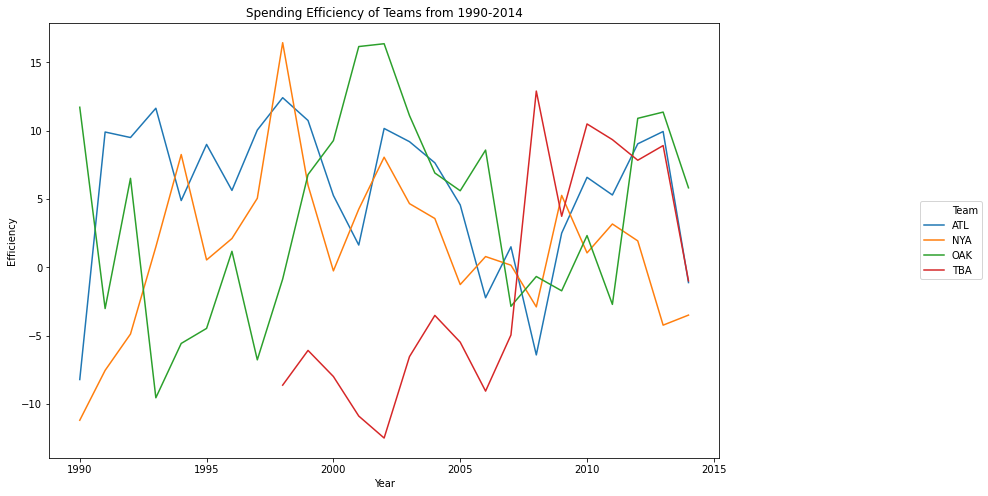

In [19]:
team_query = """SELECT Teams.yearID as Year,  Teams.teamID as Team, Teams.franchID as Franchise, Rank, Teams.lgID as League, G, W, L, (CAST(W as FLOAT)/CAST(G as FLOAT) * 100) as WinPercent, sum(salary) as Total_Payroll FROM Teams INNER JOIN Salaries ON (Teams.teamID = Salaries.teamID AND Teams.yearID = Salaries.yearID) WHERE (Teams.YearID >= 1990 and Teams.YearID <= 2014 and (Teams.teamID = "OAK" OR Teams.teamID = "NYA" OR Teams.teamID = "ATL" OR Teams.teamID = "TBA")) GROUP BY Teams.teamID, Teams.yearID""" 

team_efficiency = pd.read_sql(team_query, conn)


mean_payroll = team_salaries.groupby('Year')['Total_Payroll'].mean()
std_dev_payroll = team_salaries.groupby('Year')['Total_Payroll'].std()

team_efficiency['mean_payroll'] = team_efficiency['Year'].apply(lambda m : mean_payroll[m])
team_efficiency['sd_payroll'] = team_efficiency['Year'].apply(lambda s : std_dev_payroll[s])
team_efficiency['s_payroll'] = team_efficiency.apply(lambda i : (i.Total_Payroll - i.mean_payroll) / i.sd_payroll, axis=1)
Efficiency = []
for i,rows in team_efficiency.iterrows():
    Efficiency.append(rows["WinPercent"] - (50 + 2.5*rows["s_payroll"]))

team_efficiency.insert(10,'Efficiency',Efficiency)
final_one = sns.lineplot(x = "Year", y = "Efficiency", hue = "Team", data = team_efficiency)
final_one.legend(loc='center right', bbox_to_anchor=(1.4, .5))

coord = final_one.get_position()
final_one.set_position([coord.x0, coord.y0, coord.width * 2, coord.height * 2])
final_one.set_title("Spending Efficiency of Teams from 1990-2014")
team_efficiency

### Question 4:
This plot shows the efficiency over time of four different teams from 1990-2014 using our efficiency equation mentioned in the project README. With this, you can really see how well each team did in relation to the money they had. This makes it a lot easier to make generatlizations as well as draw conclusions from the data. The efficiency of Oakland during the moneyball era is very clear as it is the largest spike and beats all the other top teams at the time.